In [8]:

from IPython.display import Image

In [5]:
Image(url="https://www.cntk.ai/jup/cancer_data_plot.jpg", width=400, height=400)

In [6]:
Image(url= "https://www.cntk.ai/jup/cancer_classify_plot.jpg", width=400, height=400)

In [7]:
Image(url= "https://www.cntk.ai/jup/logistic_neuron.jpg", width=300, height=200)

In [10]:
# Import the relevant components
from __future__ import print_function
import numpy as np
import sys
import os

import cntk as C
import cntk.tests.test_utils
cntk.tests.test_utils.set_device_from_pytest_env() # (only needed for our build system)
C.cntk_py.set_fixed_random_seed(1) # fix the random seed so that LR examples are repeatable

In [11]:
input_dim = 2
num_output_classes = 2

In [12]:
# Ensure that we always get the same results
np.random.seed(0)

# Helper function to generate a random data sample
def generate_random_data_sample(sample_size, feature_dim, num_classes):
    # Create synthetic data using NumPy.
    Y = np.random.randint(size=(sample_size, 1), low=0, high=num_classes)

    # Make sure that the data is separable
    X = (np.random.randn(sample_size, feature_dim)+3) * (Y+1)

    # Specify the data type to match the input variable used later in the tutorial
    # (default type is double)
    X = X.astype(np.float32)

    # convert class 0 into the vector "1 0 0",
    # class 1 into the vector "0 1 0", ...
    class_ind = [Y==class_number for class_number in range(num_classes)]
    Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    return X, Y

In [13]:
# Create the input variables denoting the features and the label data. Note: the input
# does not need additional info on the number of observations (Samples) since CNTK creates only
# the network topology first
mysamplesize = 32
features, labels = generate_random_data_sample(mysamplesize, input_dim, num_output_classes)

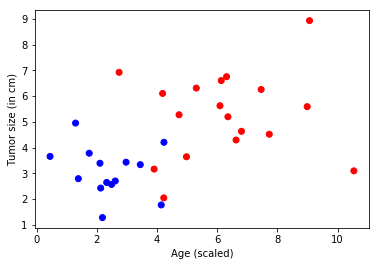

In [14]:
# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

# let 0 represent malignant/red and 1 represent benign/blue
colors = ['r' if label == 0 else 'b' for label in labels[:,0]]

plt.scatter(features[:,0], features[:,1], c=colors)
plt.xlabel("Age (scaled)")
plt.ylabel("Tumor size (in cm)")
plt.show()